# Swiss Market Analysis

In [10]:
import yfinance as yf
import pandas as pd
import time

# List of top 30 swiss company tickers
companies = [
    # Swiss Companies with Market Cap, Revenue, Employees, PE Ratio, Products
    'NESN.SW',  # Nestlé - Market Cap: 340B USD, Revenue: 95B USD, Employees: 270,000, PE Ratio: 25, Products: Food & Beverages
    'ROG.SW',   # Roche Holding - Market Cap: 250B USD, Revenue: 70B USD, Employees: 100,000, PE Ratio: 21, Products: Pharmaceuticals & Diagnostics
    'NOVN.SW',  # Novartis - Market Cap: 200B USD, Revenue: 53B USD, Employees: 100,000, PE Ratio: 20, Products: Pharmaceuticals & Gene Therapies
    'ZURN.SW',  # Zurich Insurance Group - Market Cap: 70B USD, Revenue: 50B USD, Employees: 56,000, PE Ratio: 12, Products: Insurance & Asset Management
    'UBSG.SW',  # UBS Group - Market Cap: 60B USD, Revenue: 35B USD, Employees: 72,000, PE Ratio: 9, Products: Banking & Wealth Management
    'ABBN.SW',  # ABB Ltd - Market Cap: 60B USD, Revenue: 30B USD, Employees: 105,000, PE Ratio: 18, Products: Robotics & Automation
    'CFR.SW',   # Cie Financière Richemont - Market Cap: 60B USD, Revenue: 20B USD, Employees: 35,000, PE Ratio: 32, Products: Luxury Goods & Jewelry
    'ALC.SW',   # Alcon - Market Cap: 40B USD, Revenue: 8B USD, Employees: 24,000, PE Ratio: 40, Products: Eye Care & Surgical Products
    'GIVN.SW',  # Givaudan - Market Cap: 40B USD, Revenue: 7B USD, Employees: 16,000, PE Ratio: 35, Products: Flavors & Fragrances
    'SREN.SW',  # Swiss Re - Market Cap: 30B USD, Revenue: 40B USD, Employees: 14,000, PE Ratio: 11, Products: Reinsurance
    'LONN.SW',  # Lonza Group - Market Cap: 50B USD, Revenue: 6B USD, Employees: 17,000, PE Ratio: 25, Products: Biotech Solutions & Manufacturing
    'SCMN.SW',  # Swisscom - Market Cap: 30B USD, Revenue: 12B USD, Employees: 19,000, PE Ratio: 16, Products: Telecommunications
    'PGHN.SW',  # Partners Group - Market Cap: 25B USD, Revenue: 2B USD, Employees: 1,800, PE Ratio: 22, Products: Private Equity & Asset Management
    'GEBN.SW',  # Geberit - Market Cap: 20B USD, Revenue: 4B USD, Employees: 12,000, PE Ratio: 30, Products: Sanitary Products
    'SIKA.SW',  # Sika - Market Cap: 40B USD, Revenue: 10B USD, Employees: 25,000, PE Ratio: 33, Products: Construction Chemicals
    'BAER.SW',  # Julius Baer Group - Market Cap: 15B USD, Revenue: 4B USD, Employees: 6,700, PE Ratio: 13, Products: Private Banking
    'SCHN.SW',  # Schindler Holding - Market Cap: 20B USD, Revenue: 12B USD, Employees: 69,000, PE Ratio: 18, Products: Elevators & Escalators
    'SGSN.SW',  # SGS - Market Cap: 20B USD, Revenue: 7B USD, Employees: 97,000, PE Ratio: 28, Products: Inspection & Certification
    'LOGN.SW',  # Logitech International - Market Cap: 10B USD, Revenue: 5B USD, Employees: 7,000, PE Ratio: 17, Products: Computer Accessories
    # 'CSGN.SW',  # Credit Suisse - Market Cap: 10B USD, Revenue: 20B USD, Employees: 50,000, PE Ratio: N/A, Products: Banking & Investment
    'ADEN.SW',  # Adecco Group - Market Cap: 8B USD, Revenue: 25B USD, Employees: 30,000, PE Ratio: 11, Products: Staffing & HR Solutions
    'LISN.SW',  # Lindt & Sprüngli - Market Cap: 25B USD, Revenue: 5B USD, Employees: 14,000, PE Ratio: 45, Products: Chocolate & Confectionery
    'SOON.SW',  # Sonova Holding - Market Cap: 20B USD, Revenue: 4B USD, Employees: 17,000, PE Ratio: 26, Products: Hearing Aids
    'STMN.SW',  # Straumann Holding - Market Cap: 20B USD, Revenue: 2B USD, Employees: 9,000, PE Ratio: 35, Products: Dental Implants
    'TEMN.SW',  # Temenos - Market Cap: 8B USD, Revenue: 1B USD, Employees: 4,000, PE Ratio: 20, Products: Banking Software
    'HELN.SW',  # Helvetia Holding - Market Cap: 5B USD, Revenue: 10B USD, Employees: 11,000, PE Ratio: 8, Products: Insurance
    'BALN.SW',  # Baloise Holding - Market Cap: 7B USD, Revenue: 9B USD, Employees: 7,500, PE Ratio: 9, Products: Insurance & Pensions
    'CLN.SW',   # Clariant - Market Cap: 5B USD, Revenue: 4B USD, Employees: 13,000, PE Ratio: 18, Products: Specialty Chemicals
    'KNIN.SW',  # Kuehne + Nagel - Market Cap: 30B USD, Revenue: 30B USD, Employees: 79,000, PE Ratio: 15, Products: Logistics & Freight
    # 'DUFN.SW',  # Dufry - Market Cap: 5B USD, Revenue: 7B USD, Employees: 20,000, PE Ratio: 12, Products: Travel Retail
]


# Define the metrics we want to collect
metrics = [
    'shortName', 'marketCap', 'trailingPE', 'forwardPE', 'priceToBook', 'dividendYield',
    'revenue', 'grossProfits', 'freeCashflow', 'fullTimeEmployees', 'industry',
    'longBusinessSummary', 'operatingMargins'
]

# Create an empty DataFrame to store the financial data
financial_data = pd.DataFrame(columns=['Company', 'last_traded_price', 'sales_margin_%'] + metrics)

# Pull financial data for each company and add it to the DataFrame
for ticker in companies:
    try:
        company = yf.Ticker(ticker)
        info = company.info
        hist = company.history(period='1d')  # Get last traded price

        # Create a row of data for each company, handling missing 'shortName' keys
        row = {metric: info.get(metric, 'N/A') for metric in metrics}
        row['Company'] = info.get('shortName', ticker)  # Use the ticker symbol if 'shortName' is missing

        # Get last traded price (closing price)
        row['last_traded_price'] = hist['Close'].values[0] if not hist.empty else 'N/A'

        # Calculate sales margin % (operating margin * 100)
        row['sales_margin_%'] = f"{info.get('operatingMargins', 0) * 100:.2f}%" if info.get('operatingMargins') else 'N/A'

        # Append the row to the DataFrame using pd.concat, ensuring the row is not empty
        if any(value != 'N/A' for value in row.values()):  # Check if at least one value is not 'N/A'
            financial_data = pd.concat([financial_data, pd.DataFrame([row])], ignore_index=True)

        # Delay to avoid rate-limiting issues
        time.sleep(2)  # 2 seconds delay between requests

    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")

# Convert marketCap to numeric values and handle missing data
financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'], errors='coerce')

# Sort the DataFrame by marketCap in descending order
financial_data = financial_data.sort_values(by='marketCap', ascending=False)

# Format marketCap as currency (e.g., $100B)
financial_data['marketCap'] = financial_data['marketCap'].apply(lambda x: f"${x:,.0f}" if pd.notna(x) else 'N/A')

# Display the sorted and formatted DataFrame
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame
display(financial_data)

# Optional: Save the DataFrame to a CSV file
#financial_data.to_csv('top_33_healthcare_companies_sorted_financials.csv', index=False)


<ipython-input-10-0901cfea8fb4>:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  financial_data = pd.concat([financial_data, pd.DataFrame([row])], ignore_index=True)


,Company,last_traded_price,sales_margin_%,shortName,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,revenue,grossProfits,freeCashflow,fullTimeEmployees,industry,longBusinessSummary,operatingMargins
1,ROCHE GS,261.600006,35.27%,ROCHE GS,"$210,720,882,688",19.773243,12.815645,7.202048,0.0365,N/A,N/A,8125374976,103605,Drug Manufacturers - General,Roche Holding AG engages in the pharmaceutical...,0.35268
0,NESTLE N,78.739998,17.23%,NESTLE N,"$202,464,952,320",18.440280,17.146278,6.252680,0.0386,N/A,N/A,9712874496,270000,Packaged Foods,"Nestlé S.A., together with its subsidiaries, o...",0.17229
2,NOVARTIS N,92.730003,33.47%,NOVARTIS N,"$185,392,316,416",18.362375,11.278388,4.279978,0.0359,N/A,N/A,5675749888,76057,Drug Manufacturers - General,"Novartis AG engages in the research, developme...",0.33473
5,ABB LTD N,50.240002,17.19%,ABB LTD N,"$92,452,159,488",27.304348,20.074480,6.577638,0.0175,N/A,N/A,3854874880,109970,Electrical Equipment & Parts,"ABB Ltd provides electrification, motion, and ...",0.17188
4,UBS GROUP N,28.280001,24.81%,UBS GROUP N,"$90,091,880,448",25.026550,14.944777,1.035253,0.0227,N/A,N/A,N/A,109396,Banks - Diversified,UBS Group AG provides financial advice and sol...,0.24806
3,ZURICH INSURANCE N,526.400024,14.03%,ZURICH INSURANCE N,"$75,796,340,736",17.813875,13.900663,3.147892,0.0500,N/A,N/A,2239000064,60000,Insurance - Diversified,"Zurich Insurance Group AG, together with its s...",0.14030
6,RICHEMONT N,120.800003,21.91%,RICHEMONT N,"$70,709,075,968",22.165138,17.479204,3.553568,0.0233,N/A,N/A,2932250112,37117,Luxury Goods,"Compagnie Financière Richemont SA, an investme...",0.21911
10,LONZA N,558.799988,18.02%,LONZA N,"$40,298,754,048",70.555550,33.685196,4.264737,0.0072,N/A,N/A,180750000,17834,Diagnostics & Research,"Lonza Group AG, together with its subsidiaries...",0.18024
14,SIKA N,237.800003,14.95%,SIKA N,"$38,150,492,160",31.084967,27.276650,5.949611,0.0139,N/A,N/A,N/A,34000,Specialty Chemicals,"Sika AG, a specialty chemicals company, develo...",0.14954
7,ALCON N,76.459999,13.53%,ALCON N,"$37,817,114,624",39.210255,22.257090,1.768066,0.0031,N/A,N/A,1305874944,25000,Medical Instruments & Supplies,"Alcon Inc. researches, develops, manufactures,...",0.13529


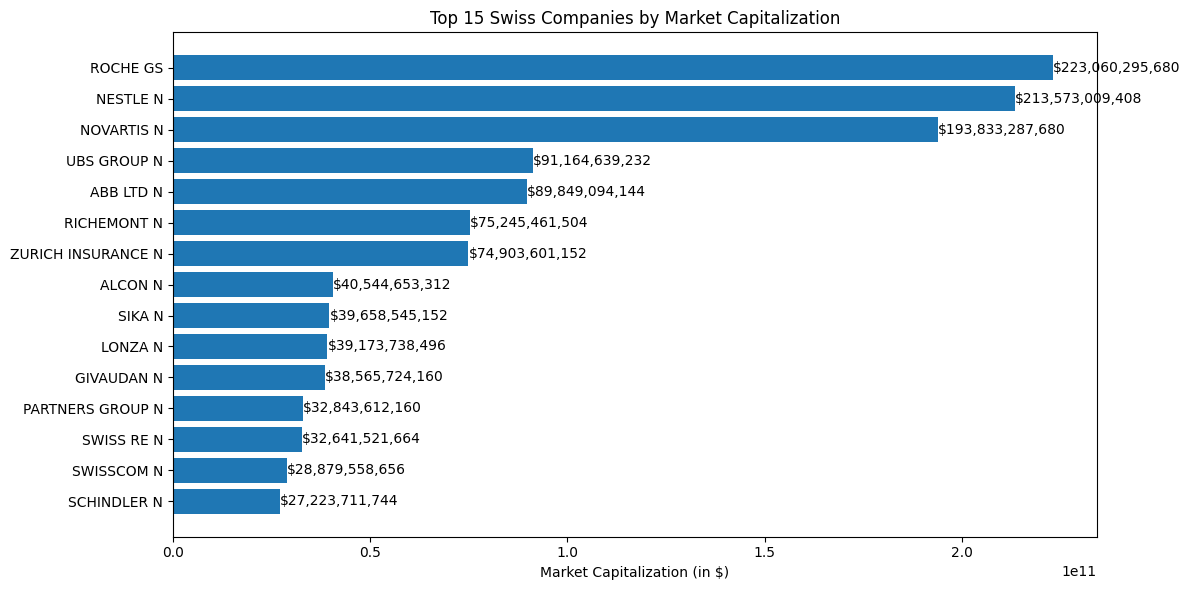

In [ ]:
import matplotlib.pyplot as plt

# Sort the data by marketCap and take the top 10 companies
top_companies = financial_data.head(15)

# Convert the marketCap column to a numeric format for plotting
market_caps = top_companies['marketCap'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

# Plot a bar chart for the top 10 companies by market capitalization
plt.figure(figsize=(12, 6))
bars = plt.barh(top_companies['Company'], market_caps)

# Add the market capitalization values on the bars
for index, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f"${market_caps.iloc[index]:,.0f}", va='center')

# Set labels and title
plt.xlabel('Market Capitalization (in $)')
plt.title('Top 15 Swiss Companies by Market Capitalization')
plt.gca().invert_yaxis()  # Invert the y-axis to show the largest company at the top

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-9-ba632bbceda2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_data['fullTimeEmployees'] = pd.to_numeric(employee_data['fullTimeEmployees'], errors='coerce')


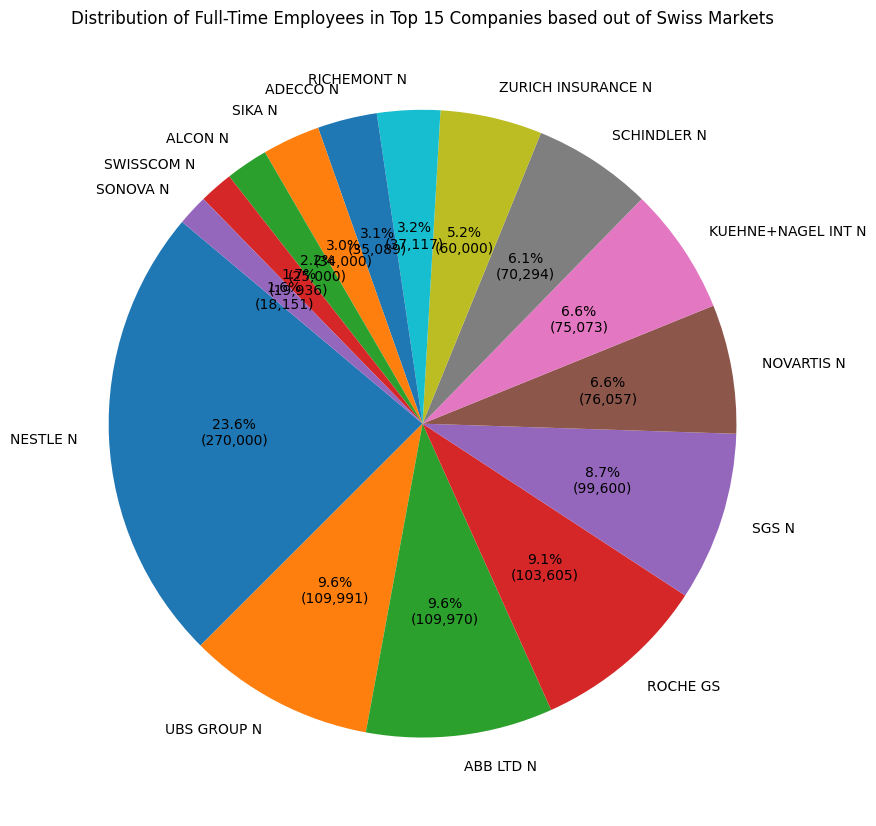

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Drop any rows where fullTimeEmployees is 'N/A' and convert the column to numeric
employee_data = financial_data[financial_data['fullTimeEmployees'] != 'N/A']
employee_data['fullTimeEmployees'] = pd.to_numeric(employee_data['fullTimeEmployees'], errors='coerce')

# Take the top 10 companies with the highest number of employees
top_employers = employee_data.nlargest(15, 'fullTimeEmployees')

# Function to display both percentage and number of employees in each pie chart slice
def pie_label_func(pct, all_values):
    absolute = int(np.round(pct / 100. * np.sum(all_values)))
    return f"{pct:.1f}%\n({absolute:,})"

# Plot a pie chart
plt.figure(figsize=(9, 9))
plt.pie(
    top_employers['fullTimeEmployees'],
    labels=top_employers['Company'],
    autopct=lambda pct: pie_label_func(pct, top_employers['fullTimeEmployees']),
    startangle=140
)
plt.title('Distribution of Full-Time Employees in Top 15 Companies based out of Swiss Markets')
plt.tight_layout()
plt.show()


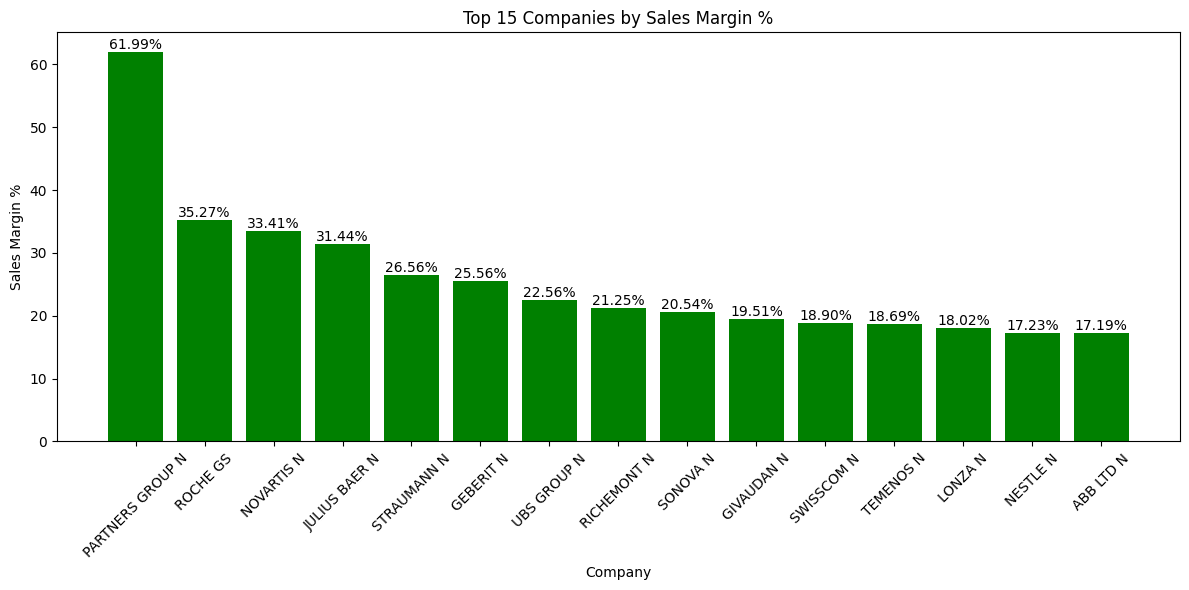

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'N/A' is replaced with NaN and convert sales_margin_% to string type first
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].replace('N/A', np.nan)

# Convert only valid string entries, ignoring NaN, and strip the '%' symbol
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].apply(
    lambda x: str(x).rstrip('%') if isinstance(x, str) else x
).astype('float')

# Take the top 10 companies based on sales margin %
top_sales_margin = financial_data.nlargest(15, 'sales_margin_%')

# Plot a bar chart with expanded x-axis
plt.figure(figsize=(12, 6))  # Expand the width of the figure for better readability
bars = plt.bar(top_sales_margin['Company'], top_sales_margin['sales_margin_%'], color='green')

# Add labels to the bars to show the exact values of sales margin %
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Company')
plt.ylabel('Sales Margin %')
plt.title('Top 15 Companies by Sales Margin %')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent labels from being cut off
plt.show()


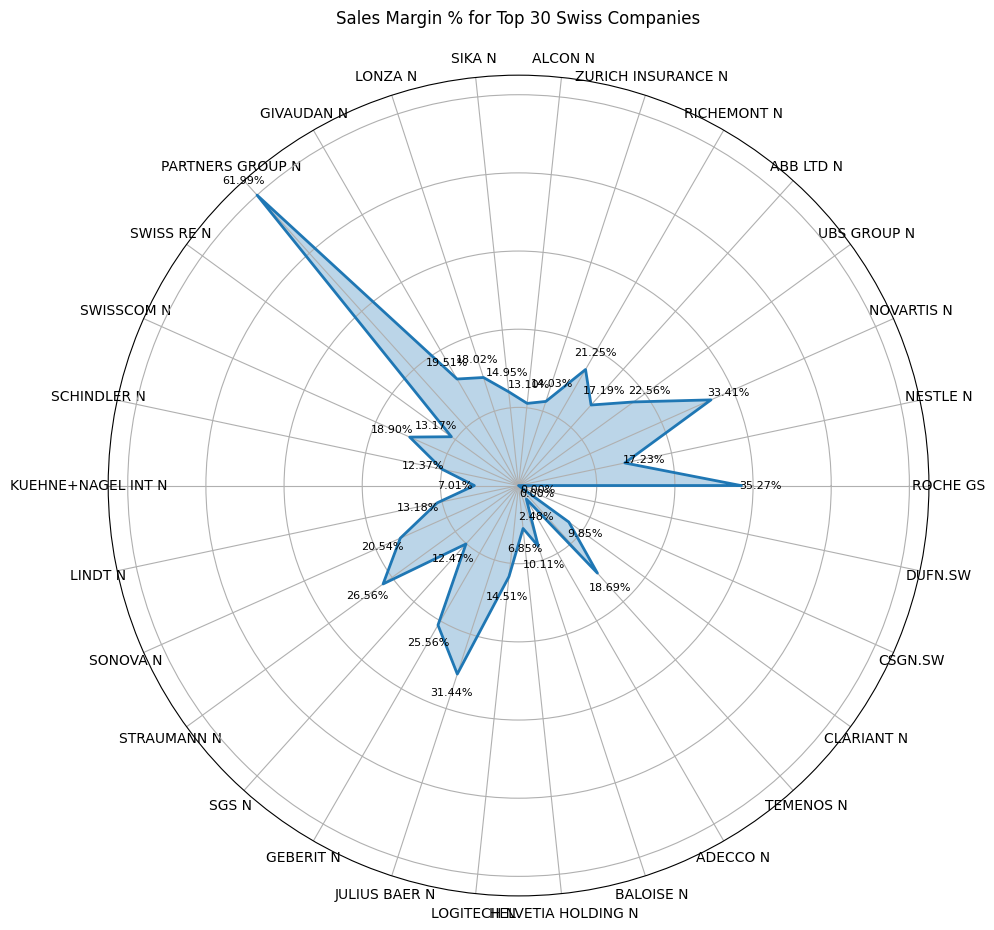

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame `financial_data` with a 'Company' and 'sales_margin_%' columns.

# Step 1: Extract only the necessary columns
df = financial_data[['Company', 'sales_margin_%']].copy()

# Step 2: Replace 'N/A' with NaN, convert to string for replacement, then fill NaN with 0
df['sales_margin_%'] = df['sales_margin_%'].replace('N/A', np.nan).astype(str).str.replace('%', '')
df['sales_margin_%'] = pd.to_numeric(df['sales_margin_%'], errors='coerce').fillna(0)

# Step 3: Use the absolute value of sales margin for normalization
df['abs_sales_margin'] = df['sales_margin_%'].abs()
max_sales_margin = df['abs_sales_margin'].max()
df['normalized_sales_margin'] = df['abs_sales_margin'] / max_sales_margin

# Step 4: Prepare data for radar chart
labels = df['Company'].tolist()  # List of companies for the radar chart
num_vars = len(labels)

# Define the angle of each axis in the plot (equal distribution of angles)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the plot" by appending the first element to the end
values = df['normalized_sales_margin'].tolist()
values += values[:1]
angles += angles[:1]

# Step 5: Plot the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot the normalized sales margin for each company
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Sales Margin % (Normalized)')
ax.fill(angles, values, alpha=0.3)

# Set the category labels
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])  # Skip the last angle for labels
ax.set_xticklabels(labels, fontsize=10, rotation=45)

# Add annotations for each original sales margin percentage
for i, (angle, value, margin) in enumerate(zip(angles, values, df['sales_margin_%'].tolist())):
    # Adjust position for label slightly away from the plotted point
    ax.text(angle, value + 0.05, f"{margin:.2f}%", ha='center', va='center', fontsize=8, color='black')

# Add a title
plt.title("Sales Margin % for Top 30 Swiss Companies", pad=20)

# Show the plot
plt.tight_layout()
plt.show()


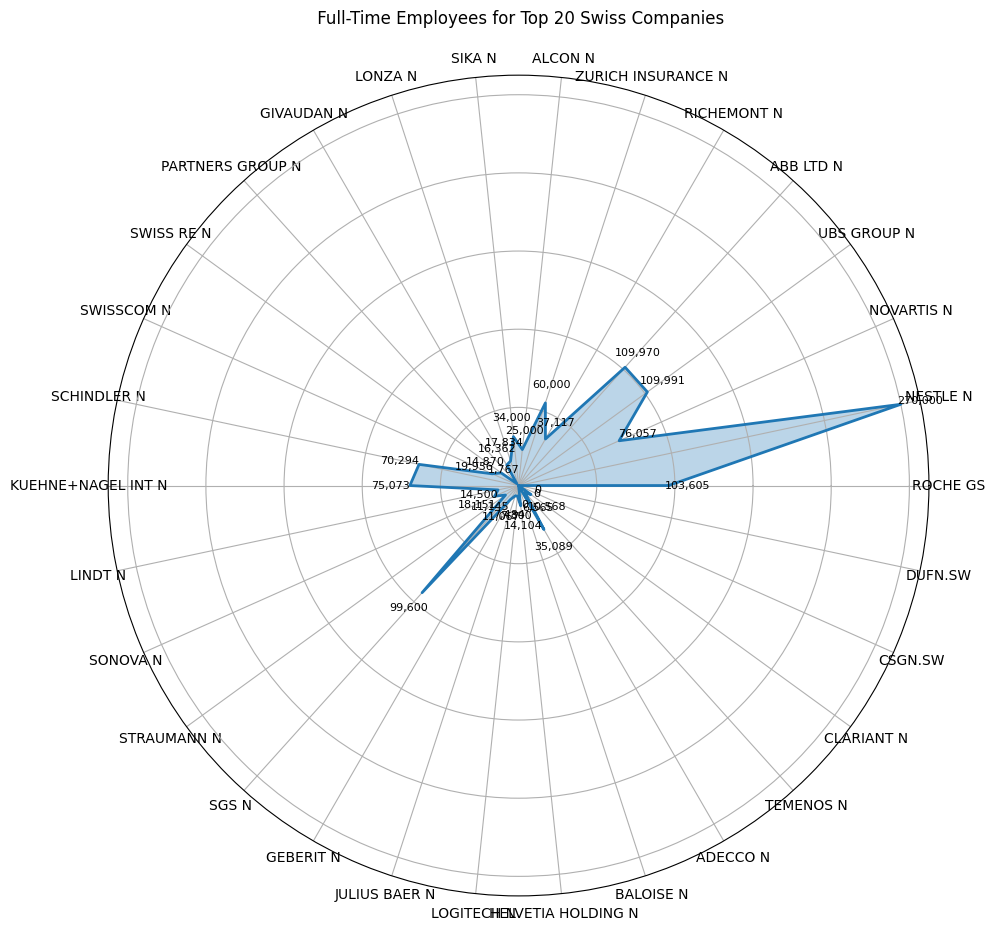

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame `financial_data` with 'Company' and 'fullTimeEmployees' columns.

# Step 1: Extract only the necessary columns
df = financial_data[['Company', 'fullTimeEmployees']].copy()

# Step 2: Replace 'N/A' with NaN and then fill NaN with 0
df['fullTimeEmployees'] = pd.to_numeric(df['fullTimeEmployees'], errors='coerce').fillna(0)

# Step 3: Normalize the full-time employees for the radar chart
max_employees = df['fullTimeEmployees'].max()
df['normalized_employees'] = df['fullTimeEmployees'] / max_employees

# Step 4: Prepare data for radar chart
labels = df['Company'].tolist()  # List of companies for the radar chart
num_vars = len(labels)

# Define the angle of each axis in the plot (equal distribution of angles)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the plot" by appending the first element to the end
values = df['normalized_employees'].tolist()
values += values[:1]
angles += angles[:1]

# Step 5: Plot the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot the normalized full-time employees for each company
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Full-Time Employees (Normalized)')
ax.fill(angles, values, alpha=0.3)

# Set the category labels
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])  # Skip the last angle for labels
ax.set_xticklabels(labels, fontsize=10, rotation=45)

# Add annotations for each full-time employee count
for i, (angle, value, employee_count) in enumerate(zip(angles, values, df['fullTimeEmployees'].tolist())):
    # Adjust position for label slightly away from the plotted point
    ax.text(angle, value + 0.05, f"{int(employee_count):,}", ha='center', va='center', fontsize=8, color='black')

# Add a title
plt.title(" Full-Time Employees for Top 20 Swiss Companies", pad=20)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Note: Learning and exploratory purpose.

In [ ]:
!pip install seaborn
!pip install plotly

[*********************100%***********************]  1 of 1 completed
<ipython-input-20-75b49a82a8dd>:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_closing_data = daily_closing_data.resample('Y').last()


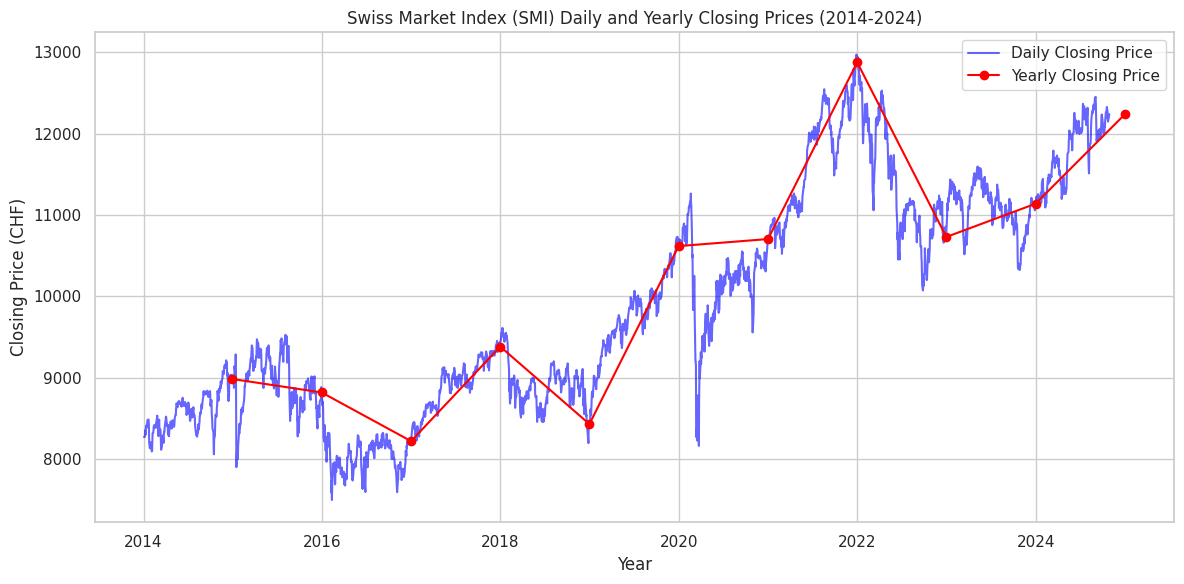

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define ticker symbol for the Swiss Market Index (SMI)
ticker = "^SSMI"

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Fetch the last 10 years of data for the SMI from Yahoo Finance
data = yf.download(ticker, start="2014-01-01", end=today)

# Prepare daily and yearly data
daily_closing_data = data['Close']
yearly_closing_data = daily_closing_data.resample('Y').last()

# Plot both daily and yearly closing prices on the same chart
plt.figure(figsize=(12, 6))

# Plot daily closing prices
plt.plot(daily_closing_data.index, daily_closing_data, label="Daily Closing Price", color="blue", alpha=0.6)

# Plot yearly closing prices with markers
plt.plot(yearly_closing_data.index, yearly_closing_data, marker='o', linestyle='-', label="Yearly Closing Price", color="red")

# Titles and labels
plt.title("Swiss Market Index (SMI) Daily and Yearly Closing Prices (2014-2024)")
plt.xlabel("Year")
plt.ylabel("Closing Price (CHF)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define ticker symbol for the Swiss Market Index (SMI)
indices = {
    "Swiss Market Index (SMI)": "^SSMI"
}

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Dictionary to hold the data for each index
index_data = {}

# Fetch the last 10 years of data for each available Swiss index
for name, ticker in indices.items():
    try:
        # Download data
        data = yf.download(ticker, start="2014-01-01", end=today)
        if not data.empty:
            # Store data in dictionary
            index_data[name] = data
            # Display the last 5 days of data in a formatted table
            print(f"\nLast 10 days of data for {name}:\n")
            print(data.tail(10).to_string())
        else:
            print(f"\nNo data available for {name}.\n")
    except Exception as e:
        print(f"\nFailed to retrieve data for {name}: {e}\n")


[*********************100%***********************]  1 of 1 completed


Last 10 days of data for Swiss Market Index (SMI):

Price                         Adj Close         Close          High           Low          Open    Volume
Ticker                            ^SSMI         ^SSMI         ^SSMI         ^SSMI         ^SSMI     ^SSMI
Date                                                                                                     
2024-10-15 00:00:00+00:00  12218.849609  12218.849609  12301.700195  12208.809570  12288.879883  22767700
2024-10-16 00:00:00+00:00  12193.070312  12193.070312  12223.110352  12161.009766  12161.009766  20569400
2024-10-17 00:00:00+00:00  12304.269531  12304.269531  12353.120117  12130.490234  12159.219727  27690800
2024-10-18 00:00:00+00:00  12326.759766  12326.759766  12348.160156  12280.519531  12289.139648  24020800
2024-10-21 00:00:00+00:00  12261.870117  12261.870117  12355.259766  12251.990234  12303.690430  17865900
2024-10-22 00:00:00+00:00  12163.330078  12163.330078  12238.559570  12120.990234  12234.370117  16

,country,date,GDP (Current US$),GDP Growth (Annual %),"Inflation, consumer prices (annual %)",Unemployment Rate (%)
0,Switzerland,2023-01-01,0.88,0.72,104.40,4.05
384,United States,2023-01-01,27.36,2.54,139.74,3.62
192,India,2023-01-01,3.55,7.58,216.86,4.17
320,Singapore,2023-01-01,0.50,1.08,129.96,3.47
128,United Kingdom,2023-01-01,3.34,0.10,142.74,4.06
...,...,...,...,...,...,...
329,Singapore,2014-01-01,0.31,3.94,113.81,3.74
73,Germany,2014-01-01,3.89,2.21,106.65,4.98
265,Ireland,2014-01-01,0.26,8.83,105.02,11.86
137,United Kingdom,2014-01-01,3.06,3.20,110.55,6.11


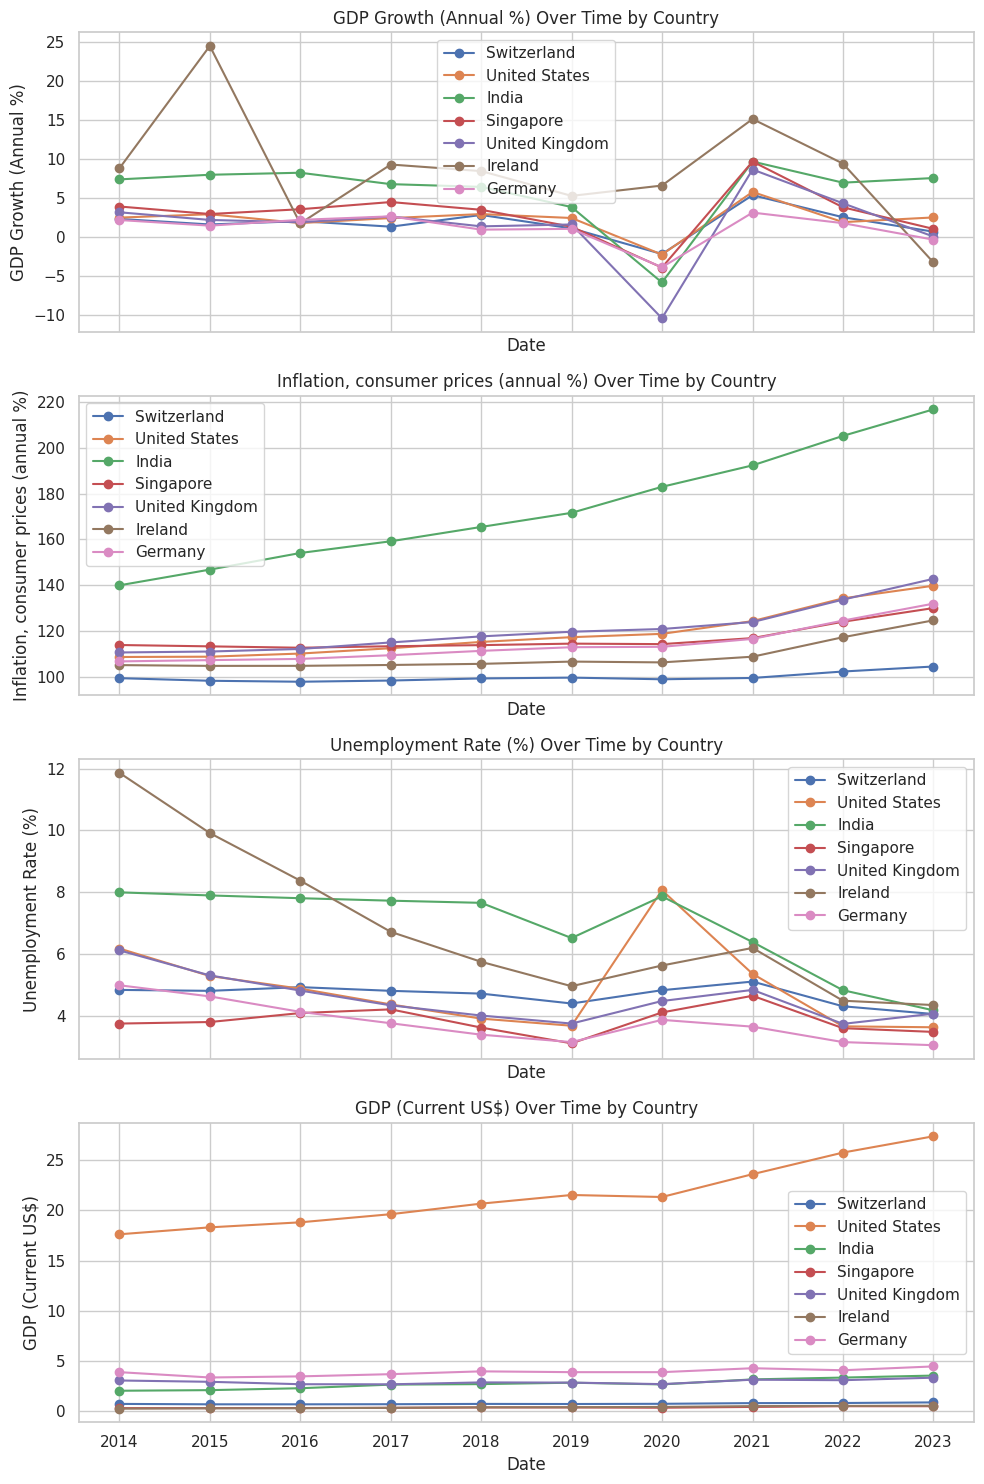

In [ ]:
import wbdata
import pandas as pd
from datetime import datetime

# Define the indicators you are interested in
indicators = {
    "NY.GDP.MKTP.CD": "GDP (Current US$)",
    "NY.GDP.MKTP.KD.ZG": "GDP Growth (Annual %)",
    "FP.CPI.TOTL": "Inflation, consumer prices (annual %)",
    "FR.INR.RINR": "Real Interest Rate (%)",
    "SL.UEM.TOTL.ZS": "Unemployment Rate (%)"
}

# Define the countries for which you want to fetch data
countries = ["CHE", "DEU", "SGP", "GBR", "IND", "IRL", "USA"]

# Define the date range for the data
start_date = datetime(2014, 1, 1)
end_date = datetime.today()

# Fetch the data using wbdata
df = wbdata.get_dataframe(indicators, country=countries)

# Extract 'date' and 'country' from the multi-index
df.reset_index(inplace=True)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter the dataframe for the specified date range
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Sort by the latest date
df.sort_values(by='date', ascending=False, inplace=True)

# Round the GDP values to the nearest trillion (divide by 1e12 and round)
df['GDP (Current US$)'] = (df['GDP (Current US$)'] / 1e12).round(2)

# Round off other values to two decimal points
df[['GDP Growth (Annual %)', 'Inflation, consumer prices (annual %)',
    'Real Interest Rate (%)', 'Unemployment Rate (%)']] = df[['GDP Growth (Annual %)',
                                                             'Inflation, consumer prices (annual %)',
                                                             'Real Interest Rate (%)',
                                                             'Unemployment Rate (%)']].round(2)

df.drop(columns=['Real Interest Rate (%)'], inplace=True)
# Display the modified data with the country field
display(df)

# Optional: Save the modified data to a CSV file
#df.to_csv('modified_world_bank_data_with_country.csv', index=False)

import matplotlib.pyplot as plt

# Define the metrics to plot
metrics = ['GDP Growth (Annual %)', 'Inflation, consumer prices (annual %)',
           'Unemployment Rate (%)', 'GDP (Current US$)']

# Create subplots for each metric
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 15), sharex=True)

# Loop through each metric to plot
for ax, metric in zip(axes, metrics):
    # Plot each country for the current metric
    for country in df['country'].unique():
        country_data = df[df['country'] == country]
        ax.plot(country_data['date'], country_data[metric], marker='o', label=country)

    # Set title, labels, and grid
    ax.set_title(f'{metric} Over Time by Country')
    ax.set_xlabel('Date')
    ax.set_ylabel(metric)
    ax.legend(loc='best')
    ax.grid(True)

plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd

# Check if 'marketCap' column is not already numeric, and convert if necessary
if financial_data['marketCap'].dtype != 'float64' and financial_data['marketCap'].dtype != 'int64':
    # Remove any non-numeric characters if needed
    financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'].str.replace('[\$,]', '', regex=True), errors='coerce')
else:
    financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'], errors='coerce')

# Similarly, ensure 'fullTimeEmployees' is numeric
financial_data['fullTimeEmployees'] = pd.to_numeric(financial_data['fullTimeEmployees'], errors='coerce')

# Drop rows with missing values in 'marketCap' or 'fullTimeEmployees' for accuracy in sums
financial_data = financial_data.dropna(subset=['marketCap', 'fullTimeEmployees'])

# Group by industry and calculate the total market cap and headcount per industry
industry_summary = financial_data.groupby('industry').agg(
    total_market_cap=pd.NamedAgg(column='marketCap', aggfunc='sum'),
    total_headcount=pd.NamedAgg(column='fullTimeEmployees', aggfunc='sum')
).reset_index()

# Calculate overall totals
total_market_cap = industry_summary['total_market_cap'].sum()
total_headcount = industry_summary['total_headcount'].sum()

# Add percentage splits for market cap and headcount for each industry
industry_summary['market_cap_%'] = (industry_summary['total_market_cap'] / total_market_cap) * 100
industry_summary['headcount_%'] = (industry_summary['total_headcount'] / total_headcount) * 100

# Sort by 'total_market_cap' in descending order
industry_summary = industry_summary.sort_values(by='total_market_cap', ascending=False)

# Format 'total_market_cap' as currency (e.g., "$100B") and 'total_headcount' with commas
industry_summary['total_market_cap'] = industry_summary['total_market_cap'].apply(lambda x: f"${x / 1e9:,.2f}B")
industry_summary['total_headcount'] = industry_summary['total_headcount'].apply(lambda x: f"{x:,.0f}")

# Add overall totals as the last row
overall_totals = pd.DataFrame({
    'industry': ['Total'],
    'total_market_cap': [f"${total_market_cap / 1e9:,.2f}B"],
    'total_headcount': [f"{total_headcount:,.0f}"],
    'market_cap_%': [100.0],
    'headcount_%': [100.0]
})

# Append overall totals to the summary DataFrame
industry_summary = pd.concat([industry_summary, overall_totals], ignore_index=True)

# Display the result
pd.options.display.float_format = '{:,.2f}'.format
display(industry_summary)

,industry,total_market_cap,total_headcount,market_cap_%,headcount_%
0,Drug Manufacturers - General,$396.06B,"179,662",29.28,14.05
1,Packaged Foods,$200.56B,"270,000",14.83,21.11
2,Electrical Equipment & Parts,$91.09B,"109,970",6.73,8.60
3,Banks - Diversified,$90.00B,"109,396",6.65,8.55
4,Insurance - Diversified,$81.98B,"74,104",6.06,5.79
5,Specialty Chemicals,$77.95B,"60,930",5.76,4.76
6,Luxury Goods,$68.16B,"37,117",5.04,2.90
7,Medical Instruments & Supplies,$55.74B,"36,145",4.12,2.83
8,Asset Management,$43.34B,"9,251",3.20,0.72
9,Diagnostics & Research,$40.30B,"17,834",2.98,1.39


In [ ]:
import requests
from datetime import datetime

# Get the current date
current_date = datetime.now().date()
print("Current Date:", current_date)

def get_weather_open_meteo(lat, lon, city_name):
    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current_weather=true"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        current_weather = data.get("current_weather", {})
        temperature = current_weather.get("temperature")
        windspeed = current_weather.get("windspeed")
        print(f"{city_name} - Temperature: {temperature}°C, Wind Speed: {windspeed} km/h")
    else:
        print(f"Failed to retrieve data for {city_name}")

# List of major cities in Switzerland with their coordinates
swiss_cities = [
    ("Zurich", 47.3769, 8.5417),
    ("Geneva", 46.2044, 6.1432),
    ("Basel", 47.5596, 7.5886),
    ("Lausanne", 46.5197, 6.6323),
    ("Bern", 46.9480, 7.4474),
    ("Winterthur", 47.4988, 8.7237),
    ("Lucerne", 47.0502, 8.3093),
    ("St. Gallen", 47.4245, 9.3767),
    ("Lugano", 46.0037, 8.9511),
    ("Biel/Bienne", 47.1329, 7.2443),
    ("Thun", 46.7586, 7.6296),
    ("Köniz", 46.9240, 7.4146),
    ("La Chaux-de-Fonds", 47.1045, 6.8285),
    ("Schaffhausen", 47.6966, 8.6349),
    ("Fribourg", 46.8065, 7.1619),
    ("Chur", 46.8508, 9.5329),
    ("Neuchâtel", 46.9896, 6.9293),
    ("Vernier", 46.2170, 6.0849),
    ("Sion", 46.2330, 7.3606),
    ("Uster", 47.3476, 8.7209)
]

# Retrieve weather for each city in Switzerland
for city_name, lat, lon in swiss_cities:
    get_weather_open_meteo(lat, lon, city_name)


Current Date: 2024-10-29
Zurich - Temperature: 10.9°C, Wind Speed: 2.2 km/h
Geneva - Temperature: 11.1°C, Wind Speed: 2.5 km/h
Basel - Temperature: 10.8°C, Wind Speed: 4.1 km/h
Lausanne - Temperature: 10.9°C, Wind Speed: 5.4 km/h
Bern - Temperature: 10.0°C, Wind Speed: 0.5 km/h
Winterthur - Temperature: 10.2°C, Wind Speed: 1.1 km/h
Lucerne - Temperature: 10.1°C, Wind Speed: 1.5 km/h
St. Gallen - Temperature: 9.1°C, Wind Speed: 2.1 km/h
Lugano - Temperature: 11.6°C, Wind Speed: 3.9 km/h
Biel/Bienne - Temperature: 10.4°C, Wind Speed: 2.9 km/h
Thun - Temperature: 8.9°C, Wind Speed: 1.5 km/h
Köniz - Temperature: 9.9°C, Wind Speed: 1.1 km/h
La Chaux-de-Fonds - Temperature: 8.5°C, Wind Speed: 3.3 km/h
Schaffhausen - Temperature: 9.7°C, Wind Speed: 1.3 km/h
Fribourg - Temperature: 9.8°C, Wind Speed: 1.8 km/h
Chur - Temperature: 8.0°C, Wind Speed: 1.5 km/h
Neuchâtel - Temperature: 11.5°C, Wind Speed: 2.6 km/h
Vernier - Temperature: 9.8°C, Wind Speed: 1.8 km/h
Sion - Temperature: 11.2°C, Wind S

In [12]:
import yfinance as yf
import pandas as pd

# List of companies (ticker symbols)
companies = [
    # Swiss Companies with Market Cap, Revenue, Employees, PE Ratio, Products
    'NESN.SW',  # Nestlé - Market Cap: 340B USD, Revenue: 95B USD, Employees: 270,000, PE Ratio: 25, Products: Food & Beverages
    'ROG.SW',   # Roche Holding - Market Cap: 250B USD, Revenue: 70B USD, Employees: 100,000, PE Ratio: 21, Products: Pharmaceuticals & Diagnostics
    'NOVN.SW',  # Novartis - Market Cap: 200B USD, Revenue: 53B USD, Employees: 100,000, PE Ratio: 20, Products: Pharmaceuticals & Gene Therapies
    'ZURN.SW',  # Zurich Insurance Group - Market Cap: 70B USD, Revenue: 50B USD, Employees: 56,000, PE Ratio: 12, Products: Insurance & Asset Management
    'UBSG.SW',  # UBS Group - Market Cap: 60B USD, Revenue: 35B USD, Employees: 72,000, PE Ratio: 9, Products: Banking & Wealth Management
    'ABBN.SW',  # ABB Ltd - Market Cap: 60B USD, Revenue: 30B USD, Employees: 105,000, PE Ratio: 18, Products: Robotics & Automation
    'CFR.SW',   # Cie Financière Richemont - Market Cap: 60B USD, Revenue: 20B USD, Employees: 35,000, PE Ratio: 32, Products: Luxury Goods & Jewelry
    'ALC.SW',   # Alcon - Market Cap: 40B USD, Revenue: 8B USD, Employees: 24,000, PE Ratio: 40, Products: Eye Care & Surgical Products
    'GIVN.SW',  # Givaudan - Market Cap: 40B USD, Revenue: 7B USD, Employees: 16,000, PE Ratio: 35, Products: Flavors & Fragrances
    'SREN.SW',  # Swiss Re - Market Cap: 30B USD, Revenue: 40B USD, Employees: 14,000, PE Ratio: 11, Products: Reinsurance
    'LONN.SW',  # Lonza Group - Market Cap: 50B USD, Revenue: 6B USD, Employees: 17,000, PE Ratio: 25, Products: Biotech Solutions & Manufacturing
    'SCMN.SW',  # Swisscom - Market Cap: 30B USD, Revenue: 12B USD, Employees: 19,000, PE Ratio: 16, Products: Telecommunications
    'PGHN.SW',  # Partners Group - Market Cap: 25B USD, Revenue: 2B USD, Employees: 1,800, PE Ratio: 22, Products: Private Equity & Asset Management
    'GEBN.SW',  # Geberit - Market Cap: 20B USD, Revenue: 4B USD, Employees: 12,000, PE Ratio: 30, Products: Sanitary Products
    'SIKA.SW',  # Sika - Market Cap: 40B USD, Revenue: 10B USD, Employees: 25,000, PE Ratio: 33, Products: Construction Chemicals
    'BAER.SW',  # Julius Baer Group - Market Cap: 15B USD, Revenue: 4B USD, Employees: 6,700, PE Ratio: 13, Products: Private Banking
    'SCHN.SW',  # Schindler Holding - Market Cap: 20B USD, Revenue: 12B USD, Employees: 69,000, PE Ratio: 18, Products: Elevators & Escalators
    'SGSN.SW',  # SGS - Market Cap: 20B USD, Revenue: 7B USD, Employees: 97,000, PE Ratio: 28, Products: Inspection & Certification
    'LOGN.SW',  # Logitech International - Market Cap: 10B USD, Revenue: 5B USD, Employees: 7,000, PE Ratio: 17, Products: Computer Accessories
    # 'CSGN.SW',  # Credit Suisse - Market Cap: 10B USD, Revenue: 20B USD, Employees: 50,000, PE Ratio: N/A, Products: Banking & Investment
    'ADEN.SW',  # Adecco Group - Market Cap: 8B USD, Revenue: 25B USD, Employees: 30,000, PE Ratio: 11, Products: Staffing & HR Solutions
    'LISN.SW',  # Lindt & Sprüngli - Market Cap: 25B USD, Revenue: 5B USD, Employees: 14,000, PE Ratio: 45, Products: Chocolate & Confectionery
    'SOON.SW',  # Sonova Holding - Market Cap: 20B USD, Revenue: 4B USD, Employees: 17,000, PE Ratio: 26, Products: Hearing Aids
    'STMN.SW',  # Straumann Holding - Market Cap: 20B USD, Revenue: 2B USD, Employees: 9,000, PE Ratio: 35, Products: Dental Implants
    'TEMN.SW',  # Temenos - Market Cap: 8B USD, Revenue: 1B USD, Employees: 4,000, PE Ratio: 20, Products: Banking Software
    'HELN.SW',  # Helvetia Holding - Market Cap: 5B USD, Revenue: 10B USD, Employees: 11,000, PE Ratio: 8, Products: Insurance
    'BALN.SW',  # Baloise Holding - Market Cap: 7B USD, Revenue: 9B USD, Employees: 7,500, PE Ratio: 9, Products: Insurance & Pensions
    'CLN.SW',   # Clariant - Market Cap: 5B USD, Revenue: 4B USD, Employees: 13,000, PE Ratio: 18, Products: Specialty Chemicals
    'KNIN.SW',  # Kuehne + Nagel - Market Cap: 30B USD, Revenue: 30B USD, Employees: 79,000, PE Ratio: 15, Products: Logistics & Freight
    # 'DUFN.SW',  # Dufry - Market Cap: 5B USD, Revenue: 7B USD, Employees: 20,000, PE Ratio: 12, Products: Travel Retail
]
# Initialize a list to store data
data = []

for ticker in companies:
    try:
        stock = yf.Ticker(ticker)

        # Fetch company info for name and industry
        company_info = stock.info
        company_name = company_info.get("shortName", "N/A")
        industry = company_info.get("industry", "N/A")

        # Fetch annual financial data as a DataFrame
        annual_financials = stock.financials

        # Get Revenue for the last two years and the corresponding years
        recent_revenue = annual_financials.loc['Total Revenue'][:2]
        recent_years = recent_revenue.index[:2]  # Get the years as the index labels

        # Calculate Revenue Growth Rate if there are at least two years of data
        if len(recent_revenue) >= 2:
            revenue_growth_rate = ((recent_revenue.iloc[0] - recent_revenue.iloc[1]) / recent_revenue.iloc[1]) * 100
        else:
            revenue_growth_rate = None

        # Append to data list with currency formatting and year labels
        data.append({
            'Ticker': ticker,
            'Company Name': company_name,
            'Industry': industry,
            f'Most Recent Revenue ({recent_years[0].year})': f"${recent_revenue.iloc[0]:,.2f}" if len(recent_revenue) > 0 else None,
            f'Previous Year Revenue ({recent_years[1].year})': f"${recent_revenue.iloc[1]:,.2f}" if len(recent_revenue) > 1 else None,
            'YoY Revenue Growth Rate (%)': revenue_growth_rate
        })

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert data to DataFrame
df = pd.DataFrame(data)

# Sort by 'YoY Revenue Growth Rate (%)' in descending order
df = df.sort_values(by='YoY Revenue Growth Rate (%)', ascending=False)

# Display the sorted DataFrame
display(df)

,Ticker,Company Name,Industry,Most Recent Revenue (2023),Previous Year Revenue (2022),YoY Revenue Growth Rate (%),Most Recent Revenue (2024),Previous Year Revenue (2023)
3,ZURN.SW,ZURICH INSURANCE N,Insurance - Diversified,"$69,963,000,000.00","$36,981,000,000.00",89.19,NaN,NaN
24,HELN.SW,HELVETIA HOLDING N,Insurance - Diversified,"$10,484,200,000.00","$7,213,500,000.00",45.34,NaN,NaN
4,UBSG.SW,UBS GROUP N,Banks - Diversified,"$39,368,000,000.00","$33,363,000,000.00",18.00,NaN,NaN
5,ABBN.SW,ABB LTD N,Electrical Equipment & Parts,"$32,235,000,000.00","$29,446,000,000.00",9.47,NaN,NaN
7,ALC.SW,ALCON N,Medical Instruments & Supplies,"$9,455,000,000.00","$8,717,000,000.00",8.47,NaN,NaN
9,SREN.SW,SWISS RE N,Insurance - Reinsurance,"$49,733,000,000.00","$46,043,000,000.00",8.01,NaN,NaN
10,LONN.SW,LONZA N,Diagnostics & Research,"$6,717,000,000.00","$6,223,000,000.00",7.94,NaN,NaN
2,NOVN.SW,NOVARTIS N,Drug Manufacturers - General,"$46,660,000,000.00","$43,461,000,000.00",7.36,NaN,NaN
14,SIKA.SW,SIKA N,Specialty Chemicals,"$11,238,600,000.00","$10,491,800,000.00",7.12,NaN,NaN
23,TEMN.SW,TEMENOS N,Software - Application,"$1,000,224,000.00","$949,628,000.00",5.33,NaN,NaN


Error fetching data for CSGN.SW: 'Total Revenue'


<ipython-input-9-977b9867ddd7>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='YoY Revenue Growth Rate (%)', y='Company Name', palette="viridis")


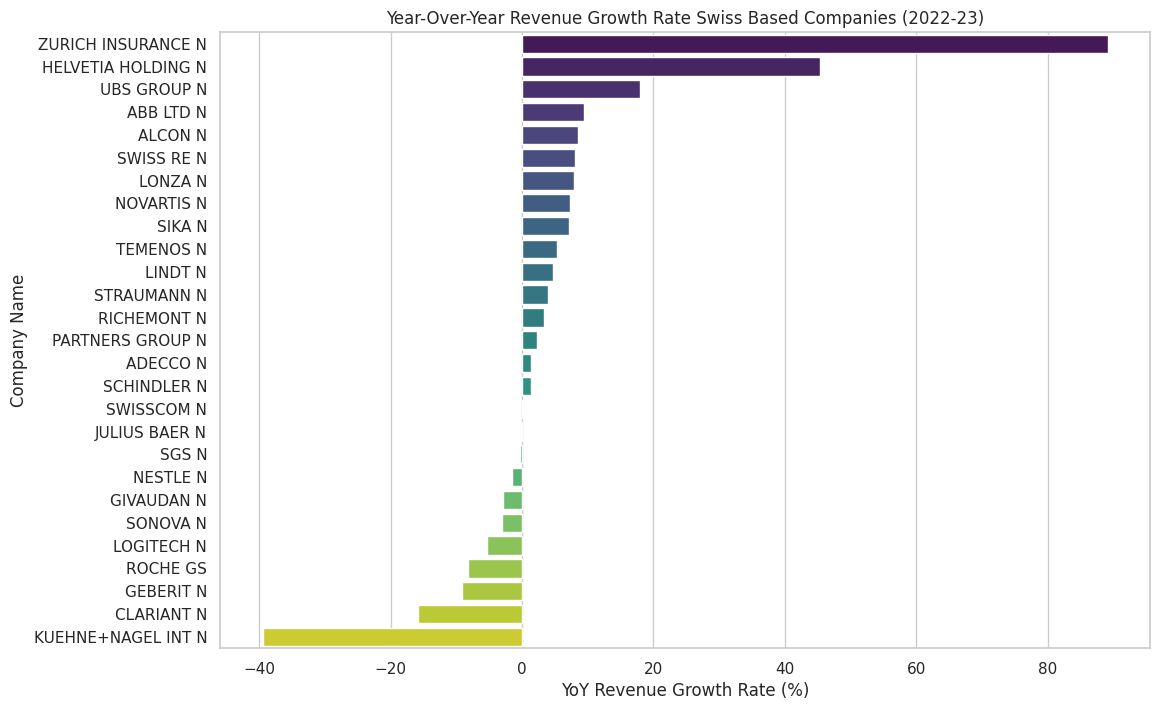

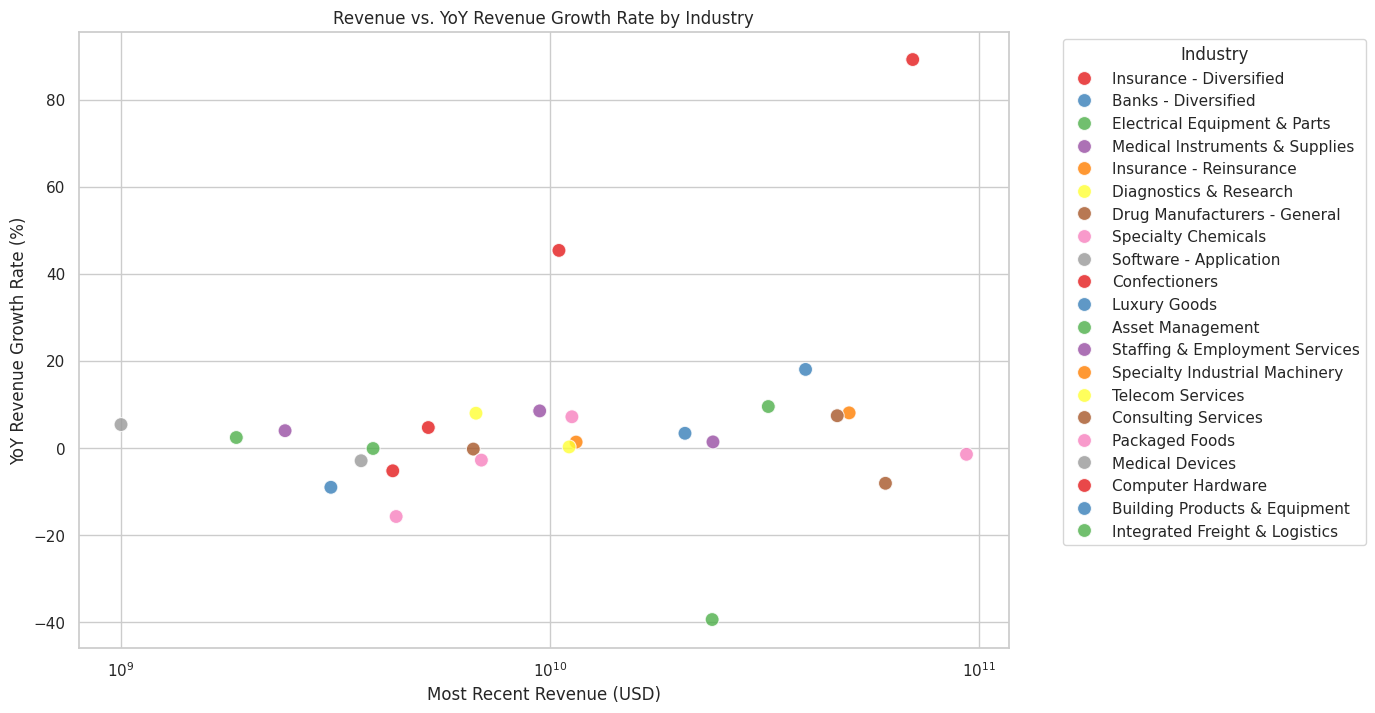

<ipython-input-9-977b9867ddd7>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='YoY Revenue Growth Rate (%)', y='Industry', palette="coolwarm")


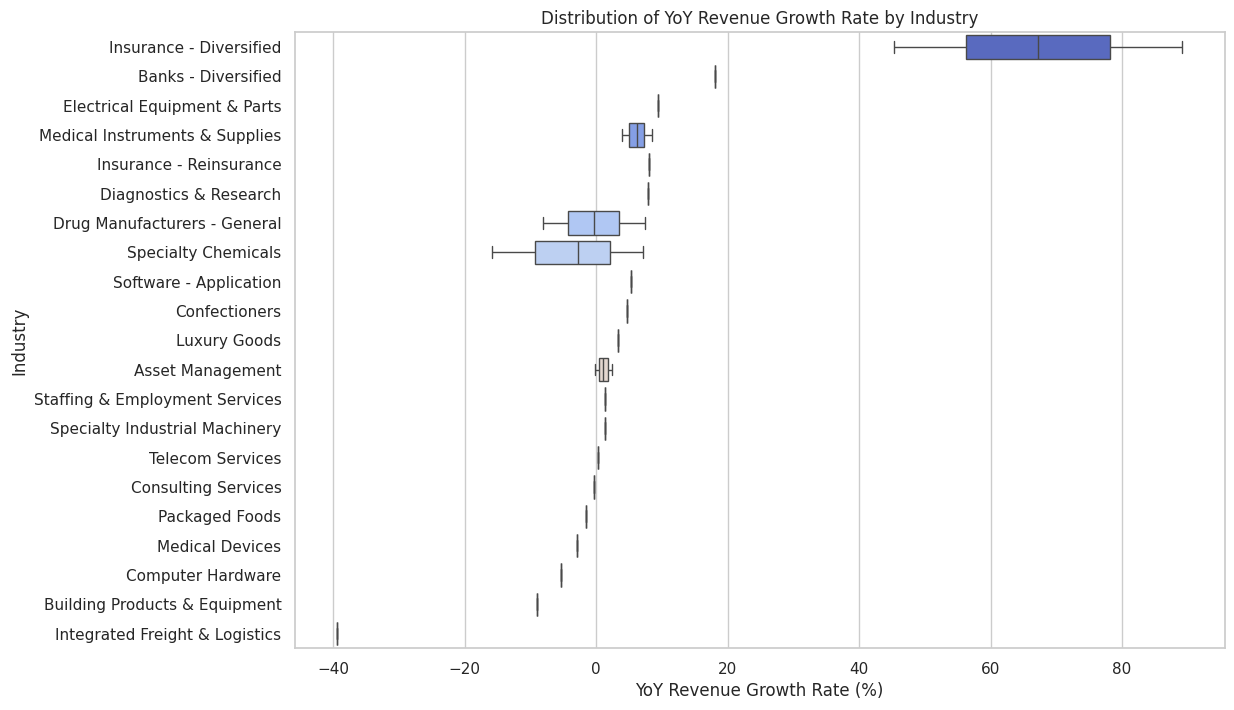

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up seaborn style for advanced visualization
sns.set(style="whitegrid")

# Sample data preparation (use the data prepared in the previous steps)
companies = [
    # Swiss Companies with Market Cap, Revenue, Employees, PE Ratio, Products
    'NESN.SW',  # Nestlé - Market Cap: 340B USD, Revenue: 95B USD, Employees: 270,000, PE Ratio: 25, Products: Food & Beverages
    'ROG.SW',   # Roche Holding - Market Cap: 250B USD, Revenue: 70B USD, Employees: 100,000, PE Ratio: 21, Products: Pharmaceuticals & Diagnostics
    'NOVN.SW',  # Novartis - Market Cap: 200B USD, Revenue: 53B USD, Employees: 100,000, PE Ratio: 20, Products: Pharmaceuticals & Gene Therapies
    'ZURN.SW',  # Zurich Insurance Group - Market Cap: 70B USD, Revenue: 50B USD, Employees: 56,000, PE Ratio: 12, Products: Insurance & Asset Management
    'UBSG.SW',  # UBS Group - Market Cap: 60B USD, Revenue: 35B USD, Employees: 72,000, PE Ratio: 9, Products: Banking & Wealth Management
    'ABBN.SW',  # ABB Ltd - Market Cap: 60B USD, Revenue: 30B USD, Employees: 105,000, PE Ratio: 18, Products: Robotics & Automation
    'CFR.SW',   # Cie Financière Richemont - Market Cap: 60B USD, Revenue: 20B USD, Employees: 35,000, PE Ratio: 32, Products: Luxury Goods & Jewelry
    'ALC.SW',   # Alcon - Market Cap: 40B USD, Revenue: 8B USD, Employees: 24,000, PE Ratio: 40, Products: Eye Care & Surgical Products
    'GIVN.SW',  # Givaudan - Market Cap: 40B USD, Revenue: 7B USD, Employees: 16,000, PE Ratio: 35, Products: Flavors & Fragrances
    'SREN.SW',  # Swiss Re - Market Cap: 30B USD, Revenue: 40B USD, Employees: 14,000, PE Ratio: 11, Products: Reinsurance
    'LONN.SW',  # Lonza Group - Market Cap: 50B USD, Revenue: 6B USD, Employees: 17,000, PE Ratio: 25, Products: Biotech Solutions & Manufacturing
    'SCMN.SW',  # Swisscom - Market Cap: 30B USD, Revenue: 12B USD, Employees: 19,000, PE Ratio: 16, Products: Telecommunications
    'PGHN.SW',  # Partners Group - Market Cap: 25B USD, Revenue: 2B USD, Employees: 1,800, PE Ratio: 22, Products: Private Equity & Asset Management
    'GEBN.SW',  # Geberit - Market Cap: 20B USD, Revenue: 4B USD, Employees: 12,000, PE Ratio: 30, Products: Sanitary Products
    'SIKA.SW',  # Sika - Market Cap: 40B USD, Revenue: 10B USD, Employees: 25,000, PE Ratio: 33, Products: Construction Chemicals
    'BAER.SW',  # Julius Baer Group - Market Cap: 15B USD, Revenue: 4B USD, Employees: 6,700, PE Ratio: 13, Products: Private Banking
    'SCHN.SW',  # Schindler Holding - Market Cap: 20B USD, Revenue: 12B USD, Employees: 69,000, PE Ratio: 18, Products: Elevators & Escalators
    'SGSN.SW',  # SGS - Market Cap: 20B USD, Revenue: 7B USD, Employees: 97,000, PE Ratio: 28, Products: Inspection & Certification
    'LOGN.SW',  # Logitech International - Market Cap: 10B USD, Revenue: 5B USD, Employees: 7,000, PE Ratio: 17, Products: Computer Accessories
    'CSGN.SW',  # Credit Suisse - Market Cap: 10B USD, Revenue: 20B USD, Employees: 50,000, PE Ratio: N/A, Products: Banking & Investment
    'ADEN.SW',  # Adecco Group - Market Cap: 8B USD, Revenue: 25B USD, Employees: 30,000, PE Ratio: 11, Products: Staffing & HR Solutions
    'LISN.SW',  # Lindt & Sprüngli - Market Cap: 25B USD, Revenue: 5B USD, Employees: 14,000, PE Ratio: 45, Products: Chocolate & Confectionery
    'SOON.SW',  # Sonova Holding - Market Cap: 20B USD, Revenue: 4B USD, Employees: 17,000, PE Ratio: 26, Products: Hearing Aids
    'STMN.SW',  # Straumann Holding - Market Cap: 20B USD, Revenue: 2B USD, Employees: 9,000, PE Ratio: 35, Products: Dental Implants
    'TEMN.SW',  # Temenos - Market Cap: 8B USD, Revenue: 1B USD, Employees: 4,000, PE Ratio: 20, Products: Banking Software
    'HELN.SW',  # Helvetia Holding - Market Cap: 5B USD, Revenue: 10B USD, Employees: 11,000, PE Ratio: 8, Products: Insurance
    # 'BALN.SW',  # Baloise Holding - Market Cap: 7B USD, Revenue: 9B USD, Employees: 7,500, PE Ratio: 9, Products: Insurance & Pensions
    'CLN.SW',   # Clariant - Market Cap: 5B USD, Revenue: 4B USD, Employees: 13,000, PE Ratio: 18, Products: Specialty Chemicals
    'KNIN.SW',  # Kuehne + Nagel - Market Cap: 30B USD, Revenue: 30B USD, Employees: 79,000, PE Ratio: 15, Products: Logistics & Freight
    # 'DUFN.SW',  # Dufry - Market Cap: 5B USD, Revenue: 7B USD, Employees: 20,000, PE Ratio: 12, Products: Travel Retail
]

# Initialize a list to store data
data = []

for ticker in companies:
    try:
        stock = yf.Ticker(ticker)
        # Fetch company info for name and industry
        company_info = stock.info
        company_name = company_info.get("shortName", "N/A")
        industry = company_info.get("industry", "N/A")

        # Fetch annual financial data as a DataFrame
        annual_financials = stock.financials

        # Get Revenue for the last two years and the corresponding years
        recent_revenue = annual_financials.loc['Total Revenue'][:2]
        recent_years = recent_revenue.index[:2]

        # Calculate Revenue Growth Rate if there are at least two years of data
        if len(recent_revenue) >= 2:
            revenue_growth_rate = ((recent_revenue.iloc[0] - recent_revenue.iloc[1]) / recent_revenue.iloc[1]) * 100
        else:
            revenue_growth_rate = None

        # Append to data list
        data.append({
            'Ticker': ticker,
            'Company Name': company_name,
            'Industry': industry,
            'Most Recent Revenue': recent_revenue.iloc[0] if len(recent_revenue) > 0 else None,
            'Previous Year Revenue': recent_revenue.iloc[1] if len(recent_revenue) > 1 else None,
            'YoY Revenue Growth Rate (%)': revenue_growth_rate
        })

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert data to DataFrame
df = pd.DataFrame(data)

# Drop rows with missing growth rates for visualizations
df = df.dropna(subset=['YoY Revenue Growth Rate (%)'])

# Sort by 'YoY Revenue Growth Rate (%)' in descending order
df = df.sort_values(by='YoY Revenue Growth Rate (%)', ascending=False)

### Visualization 1: Bar Chart of YoY Revenue Growth Rate
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='YoY Revenue Growth Rate (%)', y='Company Name', palette="viridis")
plt.title('Year-Over-Year Revenue Growth Rate Swiss Based Companies (2022-23)')
plt.xlabel('YoY Revenue Growth Rate (%)')
plt.ylabel('Company Name')
plt.show()

### Visualization 2: Scatter Plot of Revenue vs. YoY Growth Rate
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Most Recent Revenue', y='YoY Revenue Growth Rate (%)', hue='Industry', palette="Set1", s=100, edgecolor="w", alpha=0.8)
plt.title('Revenue vs. YoY Revenue Growth Rate by Industry')
plt.xlabel('Most Recent Revenue (USD)')
plt.ylabel('YoY Revenue Growth Rate (%)')
plt.xscale('log')  # Log scale to manage large revenue range
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Visualization 3: Box Plot of YoY Revenue Growth by Industry
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='YoY Revenue Growth Rate (%)', y='Industry', palette="coolwarm")
plt.title('Distribution of YoY Revenue Growth Rate by Industry')
plt.xlabel('YoY Revenue Growth Rate (%)')
plt.ylabel('Industry')
plt.show()

In [ ]:
pip install pandas matplotlib seaborn yfinance pandasdmx wbdata